<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

No handles with labels found to put in legend.
No handles with labels found to put in legend.


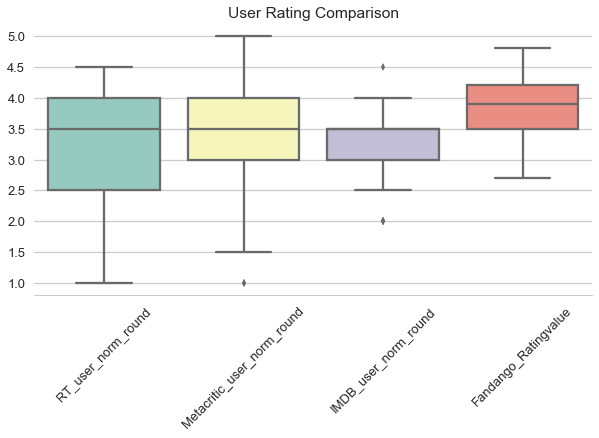

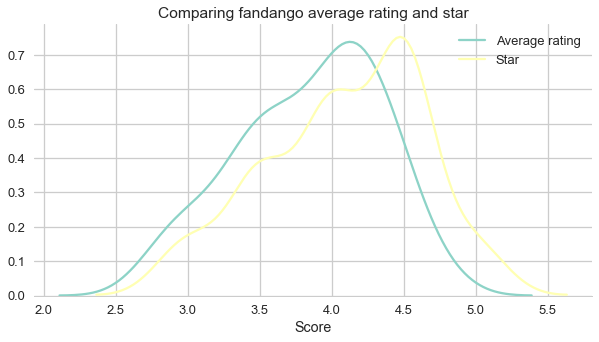

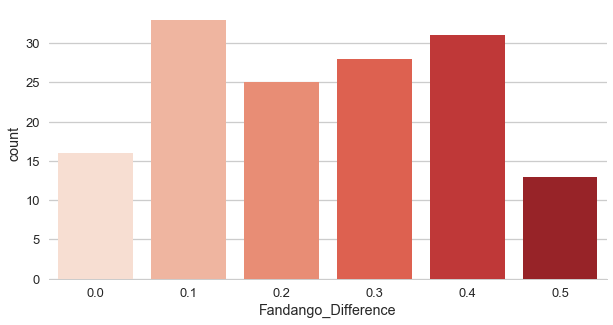

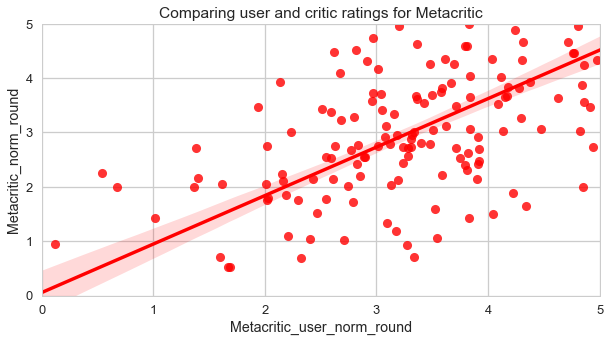

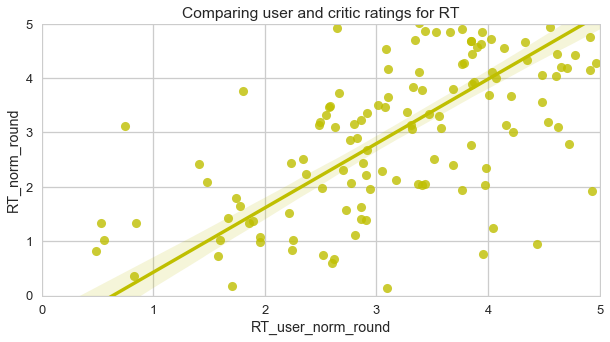

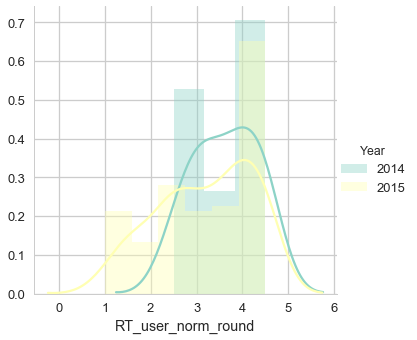

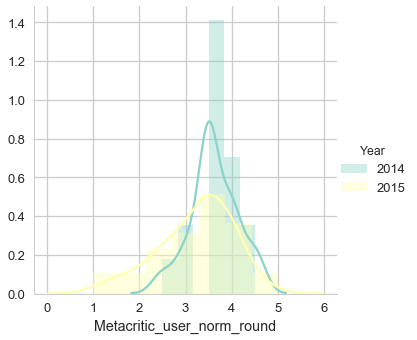

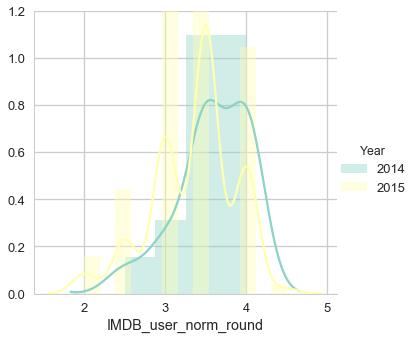

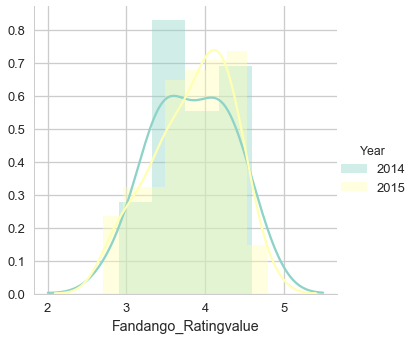

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import re

fandango = pd.read_csv("fandango_score_comparison.csv")

#checking if there is missing values 
fandango.isnull().sum() 

#checking basic info of the columns
fandango.describe()
fandango.head()
fandango.info()
fandango.columns


#fixing column names 
fandango = fandango.rename(index = str, columns = {
    "IMDB": "IMDB_user",
    "IMDB_norm_round":"IMDB_user_norm_round", 
    "IMDB_norm": "IMDB_user_norm",
    "Metacritic_user_nom": "Metacritic_user_norm",
    "Fandango_votes": "Fandango_votes_count"
    })

#selecting columns to make dataframes for easy analysis 
fandango_compare = fandango.loc[:,["Fandango_Stars","Fandango_Ratingvalue","Fandango_Difference"]]
fandango_user_norm_round = fandango.loc[:,["RT_user_norm_round","Metacritic_user_norm_round","IMDB_user_norm_round","Fandango_Ratingvalue"]]
fandango_user_vote = fandango.loc[:,["FILM", "IMDB_user_vote_count", "Metacritic_user_vote_count","Fandango_votes_count"]]

#user rating comparison
sns.set(style = "whitegrid", palette = "Set3", context = "talk")
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(data = fandango_user_norm_round)
ax.set_title("User Rating Comparison")
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 45)
sns.despine(left = True)

fandango_user_norm_round.describe()
fandango_user_norm_round["IMDB_user_norm_round"].median()
fandango_user_norm_round["IMDB_user_norm_round"].quantile(0.75)
#median and 3rd quantile for IMDB is the same 

# RT and Metacritic have less concentrated data. 
# IMDB has more concentrated data probably because of the higher vote amount 
# Fandango has higher median, shifted upwards IQR, and data more concentrated than RT and MC
# The diff can also be due to the types of voters 

# as can be seen from the user vote counts, IMDB has a much larger total number of votes
sum_meta = fandango["Metacritic_user_vote_count"].sum()
sum_IMDB = fandango["IMDB_user_vote_count"].sum()
sum_fandango = fandango["Fandango_votes_count"].sum()
print("Total number of votes for\nMetacritic:%d\nIMDB:%d\nFandango:%d"%(sum_meta,sum_IMDB,sum_fandango))
                                   
f,ax = plt.subplots(figsize = (10,5))
sns.distplot(fandango_compare["Fandango_Ratingvalue"], hist = False, label = "Average rating")
sns.distplot(fandango_compare["Fandango_Stars"],hist = False, label = "Star")
ax.set_title("Comparing fandango average rating and star")
ax.legend()
ax.set_xlabel("Score")
sns.despine(left = True)
#stars have been shifted to the right compared to average rating
#showing the discrepancies between average ratings from user and ratings shown to public 

f,ax = plt.subplots(figsize = (10,5))
sns.countplot(fandango_compare["Fandango_Difference"], palette = "Reds")
sns.despine(left = True)
#the difference between star and average rating can go up to as much as 0.5

#comparing user rating and critic rating for Metacritic 
f,ax = plt.subplots(figsize = (10,5))
g = sns.regplot(x = fandango["Metacritic_user_norm_round"], y = fandango["Metacritic_norm_round"], color = "r", x_jitter = True,y_jitter = True)
ax.legend()
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_title("Comparing user and critic ratings for Metacritic")
#user tend to rate higher when rating is higher 
#showing users tend to be more lenient in rating (overrate the movie) when the movie is considered good 

#comparing user rating and critic rating for RT 
f,ax = plt.subplots(figsize = (10,5))
g = sns.regplot(x = fandango["RT_user_norm_round"], y = fandango["RT_norm_round"], color = "y", x_jitter = True,y_jitter = True)
ax.legend()
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_title("Comparing user and critic ratings for RT")
#user tend to rate lower when rating is lower (underrate the movie) when the movie is considered poor 

#finding out the year from the film name column 
year = []
for each in fandango["FILM"]: 
    m = re.findall("[0-2][0-9][0-9][0-9]",each)
    m = "".join(m) #converting from list to string
    year.append(m)

#making a new column for year 
fandango["Year"] = year
unique = set(year) #only 2014 and 2015 data 

#comparing the diff for ratings between 2014 and 2015 for each site 
for i in ["RT_user_norm_round","Metacritic_user_norm_round","IMDB_user_norm_round","Fandango_Ratingvalue"]: 
    g = sns.FacetGrid(fandango, hue = "Year", size = 5)
    g = g.map(sns.distplot,i).add_legend()

#except fandango, all sites show ratings in 2014 to be slightly higher than 2015 
#while fandango show similar distribution for 2014 and 2015 

